# Customer Segmentation Analysis

#### 1. Data Collection & Loading

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load dataset
df = pd.read_csv("marketing_data.csv")

In [4]:
# Preview data
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

### 2. Data Exploration & Cleaning

In [7]:
# Check missing values
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [8]:

# Remove duplicates
df.drop_duplicates(inplace=True)

print("Cleaned shape:", df.shape)


Cleaned shape: (2021, 39)


### 3. Descriptive Statistics (Customer Metrics)

In [9]:
# Average purchase value
avg_purchase_value = df["MntTotal"].mean()
print("Average Purchase Value:", round(avg_purchase_value, 2))

Average Purchase Value: 563.79


In [10]:
# Purchase Frequency
df["TotalPurchases"] = (
    df["NumWebPurchases"] +
    df["NumCatalogPurchases"] +
    df["NumStorePurchases"]
)

avg_purchase_frequency = df["TotalPurchases"].mean()
print("Average Purchase Frequency:", round(avg_purchase_frequency, 2))

Average Purchase Frequency: 12.57


In [11]:
# Total Revenue
total_revenue = df["MntTotal"].sum()
print("Total Revenue:", round(total_revenue, 2))

Total Revenue: 1139418


In [12]:
# Average Revenue per Customer
avg_revenue_per_customer = df["MntTotal"].mean()
print("Average Revenue per Customer:", round(avg_revenue_per_customer, 2))

Average Revenue per Customer: 563.79


In [13]:
# Product-wise Average Spending
product_columns = [
    "MntWines", "MntFruits", "MntMeatProducts",
    "MntFishProducts", "MntSweetProducts", "MntGoldProds"
]

product_avg = df[product_columns].mean()
product_avg

MntWines            306.492331
MntFruits            26.364671
MntMeatProducts     166.059871
MntFishProducts      37.603662
MntSweetProducts     27.268679
MntGoldProds         43.921821
dtype: float64

In [14]:
# Summary Metrics Table (Report-ready)
summary = pd.DataFrame({
    "Metric": [
        "Average Purchase Value",
        "Average Purchase Frequency",
        "Total Revenue"
    ],
    "Value": [
        avg_purchase_value,
        avg_purchase_frequency,
        total_revenue
    ]
})

summary


,Metric,Value
0,Average Purchase Value,5.637892e+02
1,Average Purchase Frequency,1.256754e+01
2,Total Revenue,1.139418e+06


### 4. Customer Segmentation (K-Means Clustering)

##### Step-1. Select Behavioral & Purchase Features

In [15]:
# Create total purchase frequency
df["TotalPurchases"] = (
    df["NumWebPurchases"] +
    df["NumCatalogPurchases"] +
    df["NumStorePurchases"]
)

In [16]:
# Select features for clustering
features = df[[
    "Income",
    "Recency",
    "MntTotal",
    "TotalPurchases"
]]

##### Step 2: Feature Scaling

###### (K-Means requires normalized data)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

##### Step 3: Find Optimal Number of Clusters (Elbow Method)

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

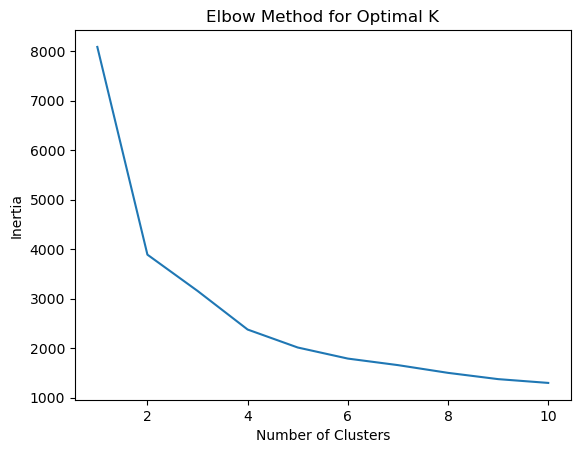

In [21]:
plt.plot(range(1, 11), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

##### Step 4: Apply K-Means Clustering

###### (Example with 4 clusters)

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["CustomerSegment"] = kmeans.fit_predict(scaled_features)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


##### Step 5: Segment Profiling

In [23]:
segment_profile = df.groupby("CustomerSegment").mean()[[
    "Income",
    "Recency",
    "MntTotal",
    "TotalPurchases"
]]

segment_profile


,Income,Recency,MntTotal,TotalPurchases
CustomerSegment,,,,
0,36248.817360,73.077758,115.815552,6.831826
1,71136.757075,22.764151,1120.077830,19.582547
2,36515.197080,23.016423,129.870438,7.187956
3,69036.372984,72.804435,1067.116935,18.909274


##### 5. Visulazation

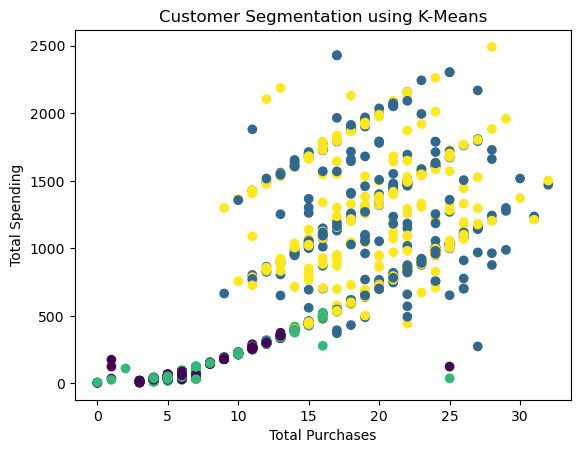

In [24]:
plt.scatter(
    df["TotalPurchases"],
    df["MntTotal"],
    c=df["CustomerSegment"]
)
plt.xlabel("Total Purchases")
plt.ylabel("Total Spending")
plt.title("Customer Segmentation using K-Means")
plt.show()

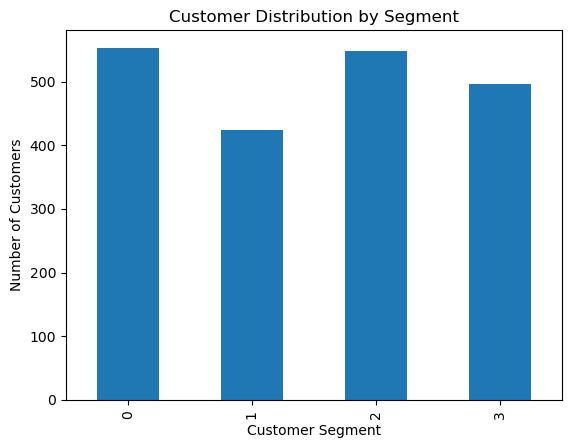

In [26]:
segment_counts = df["CustomerSegment"].value_counts().sort_index()

segment_counts.plot(kind="bar")
plt.xlabel("Customer Segment")
plt.ylabel("Number of Customers")
plt.title("Customer Distribution by Segment")
plt.show()

#### 6. Segment-wise Insights and Recommendations

Segment 1 – Low-Value / Occasional Customers

Characteristics

* Low total spending
* Low purchase frequency
* Longer recency (inactive or less engaged)

Insights

* These customers contribute minimally to revenue.
* Likely price-sensitive or low brand attachment.

Recommendations

* Use discounts, coupons, and entry-level offers.
* Run reactivation campaigns via email or SMS.
* Avoid heavy marketing spend on this segment.

Segment 2 – High-Value Loyal Customers

Characteristics
* High total spending
* High purchase frequency
* Recent purchases (low recency)

Insights

* Most profitable and loyal customers.
* Strong engagement across channels.

Recommendations

* Introduce loyalty programs and exclusive rewards.
* Offer early access to new products.
* Focus on retention and relationship marketing.

Segment 2 – High-Income but Moderate Engagement

Characteristics

* High income
* Moderate spending and purchase frequency
* Potential purchasing power not fully utilized

Insights

* Customers have capacity to spend more but are under-engaged.
* Represents strong upselling potential.

Recommendations

* Promote premium products and bundles.
* Use personalized recommendations.
* Target with lifestyle-based and aspirational marketing.

Segment 3 – Frequent Low-Spend Customers

Characteristics

* High purchase frequency
* Lower average spending per purchase
* Regular but small transactions

Insights

* Customers are engaged but have low basket size.
* Opportunity to increase average order value.

Recommendations

* Introduce bundle offers and cross-selling.
* Offer volume discounts.

Encourage larger purchases through free-shipping thresholds.